In [15]:
# MNQ Range Program 

#by Wolfrank Guzman GitHub: @guzmanwolfrank

In [16]:
# The goal of this program is to calculate the first 45 min Open Range on MNQ Futures along with the Day Range and Day Change.  

# By creating this dataframe, we can use it to analyze correlations between positive and negative days and their prospective ranges, and the change in these price swings and ranges. 
# We can later apply machine learning predictive models to the data and later backtest, deploy live and see if the correlations and projections hold true. 



In [17]:
## Data Dictionary

# ABSDayChange:  This column shows the absolute value of the Day's Change which is the Close - Open.  </br>
# DayChange:  The positive or negative value of the Day's change which is the Close - Open. 	</br>
# OpenOnlyRange:  This column shows the value of the min and max value in the first 45 minutes of the Market Open at 9:30.  We are using Equities, not Futures open. 	</br>
# DayRange:  This value contains the distance from the Day's High to Low or vice versa. </br>

In [18]:
import os
print (os.path.abspath("testfile.ext"))


C:\Users\Wolfrank\AppData\Local\Programs\Microsoft VS Code\testfile.ext


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Average Open Range: 108.72
Rolling Averages for ABSDayChange:
 - 5-day Average: 142.35
 - 10-day Average: 166.97
 - 20-day Average: 146.41
 - 30-day Average: 137.27
 - 40-day Average: 128.57
 - 50-day Average: 126.88

Rolling Averages for OpenOnlyRange:
 - 5-day Average: 167.65
 - 10-day Average: 143.12
 - 20-day Average: 117.41
 - 30-day Average: 117.86
 - 40-day Average: 109.29
 - 50-day Average: 108.72

Rolling Averages for DayRange:
 - 5-day Average: 257.10
 - 10-day Average: 295.20
 - 20-day Average: 270.50
 - 30-day Average: 257.52
 - 40-day Average: 253.18
 - 50-day Average: 256.90



,Open,High,Low,Close,Adj Close,Volume,ABSDayChange,DayChange,OpenOnlyRange,DayRange
Date,,,,,,,,,,
2024-01-05,16454.00,16577.00,16334.25,16460.25,16460.25,1098485,6.25,6.25,113.25,242.75
2024-01-08,16472.25,16811.50,16378.25,16803.75,16803.75,880010,331.50,331.50,139.00,433.25
2024-01-09,16790.00,16868.50,16658.50,16830.25,16830.25,1023133,40.25,40.25,86.00,210.00
2024-01-10,16829.50,16983.25,16801.75,16945.25,16945.25,986991,115.75,115.75,38.00,181.50
2024-01-11,16955.50,17056.00,16753.00,16966.25,16966.25,1370416,10.75,10.75,212.50,303.00
2024-01-12,16958.00,17042.50,16866.25,16969.25,16969.25,1136604,11.25,11.25,103.75,176.25
2024-01-16,16962.00,17034.00,16812.00,16966.50,16966.50,1590564,4.50,4.50,133.50,222.00
2024-01-17,16979.50,16981.25,16689.00,16869.75,16869.75,1232753,109.75,-109.75,126.25,292.25
2024-01-18,16859.50,17126.00,16833.75,17110.00,17110.00,1383841,250.50,250.50,59.25,292.25


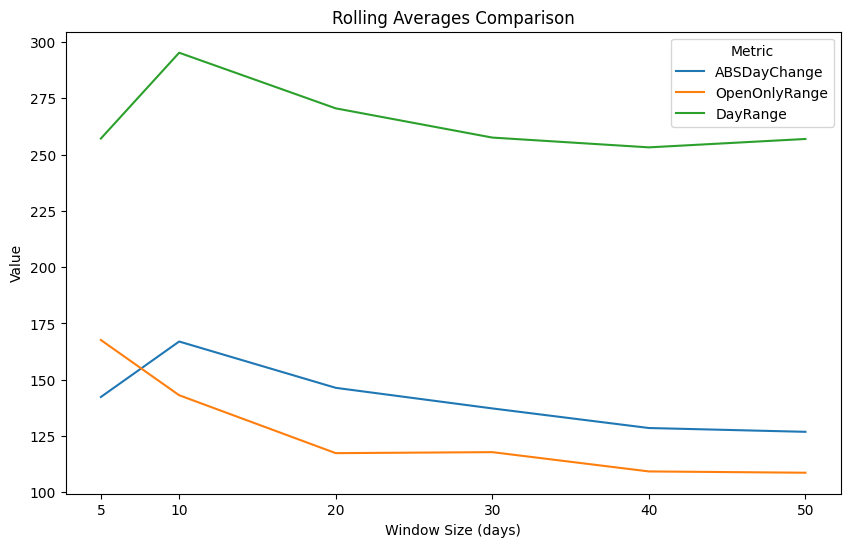

,ABSDayChange,OpenOnlyRange,DayRange
5,142.350000,167.650000,257.10000
10,166.975000,143.125000,295.20000
20,146.412500,117.412500,270.50000
30,137.266667,117.858333,257.52500
40,128.568750,109.293750,253.18125
50,126.880000,108.720000,256.90500


,Open,High,Low,Close,Adj Close,Volume,ABSDayChange,DayChange,OpenOnlyRange,DayRange,OpenOnly_as_PCT_of_DayRange
Date,,,,,,,,,,,
2024-01-05,16454.00,16577.00,16334.25,16460.25,16460.25,1098485,6.25,6.25,113.25,242.75,0.466529
2024-01-08,16472.25,16811.50,16378.25,16803.75,16803.75,880010,331.50,331.50,139.00,433.25,0.320831
2024-01-09,16790.00,16868.50,16658.50,16830.25,16830.25,1023133,40.25,40.25,86.00,210.00,0.409524
2024-01-10,16829.50,16983.25,16801.75,16945.25,16945.25,986991,115.75,115.75,38.00,181.50,0.209366
2024-01-11,16955.50,17056.00,16753.00,16966.25,16966.25,1370416,10.75,10.75,212.50,303.00,0.701320
2024-01-12,16958.00,17042.50,16866.25,16969.25,16969.25,1136604,11.25,11.25,103.75,176.25,0.588652
2024-01-16,16962.00,17034.00,16812.00,16966.50,16966.50,1590564,4.50,4.50,133.50,222.00,0.601351
2024-01-17,16979.50,16981.25,16689.00,16869.75,16869.75,1232753,109.75,-109.75,126.25,292.25,0.431993
2024-01-18,16859.50,17126.00,16833.75,17110.00,17110.00,1383841,250.50,250.50,59.25,292.25,0.202737


Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%: 32
Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%: 17
Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%: 5
Total number of instances in the DataFrame: 50


In [19]:
import yfinance as yf
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Ignore all warnings
warnings.filterwarnings('ignore')

# Set the ticker symbol 
ticker_symbol = "MNQ=F"
# Fetch intraday data using yfinance for the last 60 days with 15-minute intervals
data = yf.download(ticker_symbol, period="60d", interval="15m").round(2)

# Round numbers
data = data.round(2)
#display(data)
# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Filter rows for the specific times 09:30 and 10:15
filtered_data = data[(data.index.time == pd.to_datetime("09:30:00").time()) | (data.index.time == pd.to_datetime("10:15:00").time())]
#display(filtered_data)

# Group by date and aggregate the data
combined_data = filtered_data.groupby(filtered_data.index.date).agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Calculate the range and add it as a new column
combined_data['Range'] = combined_data['High'] - combined_data['Low']

# Round numbers
data = data.round(2)
cdata = combined_data.round(2)
#display(cdata)

# Calculate the average range for different windows of days
windows = [5, 10, 20, 30, 40, 50, 60]
for window in windows:
    avg_range = combined_data['Range'].rolling(window=window).mean().iloc[-1].round(2)
   # print(f"Average Opening Range for last {window} days:", avg_range)

# Calculate the average of the 'Range' column
average_range = combined_data['Range'].mean()

Ddata = yf.download(ticker_symbol, period="60d", interval="1d").round(2)
Ddata['ABSDayChange']= abs(Ddata['Close']- Ddata['Open'])
Ddata['DayChange']= (Ddata['Close']- Ddata['Open'])
Ddata['OpenOnlyRange']= combined_data['Range']
Ddata['DayRange']= Ddata['High']-Ddata['Low']

# Calculate absolute day change
Ddata['ABSDayChange'] = abs(Ddata['Close'] - Ddata['Open'])

# Calculate day change
Ddata['DayChange'] = Ddata['Close'] - Ddata['Open']

# Calculate OpenOnlyRange
Ddata['OpenOnlyRange'] = combined_data['Range']

# Calculate DayRange
Ddata['DayRange'] = Ddata['High'] - Ddata['Low']

# Define the window sizes
windows = [5, 10, 20, 30, 40, 50]


print("Average Open Range:", average_range)


# Calculate rolling averages for each column and window size
for column in ['ABSDayChange', 'OpenOnlyRange', 'DayRange']:
    print(f"Rolling Averages for {column}:")
    for window in windows:
        rolling_avg = Ddata[column].rolling(window=window).mean().iloc[-1]
        print(f" - {window}-day Average: {rolling_avg:.2f}")
    print()
    

display(Ddata)

# Define the window sizes
windows = [5, 10, 20, 30, 40, 50]

# Calculate rolling averages for each column and window size
rolling_avgs = {}
for column in ['ABSDayChange', 'OpenOnlyRange', 'DayRange']:
    rolling_avgs[column] = {}
    for window in windows:
        rolling_avg = Ddata[column].rolling(window=window).mean().iloc[-1]
        rolling_avgs[column][window] = rolling_avg

# Create a DataFrame for rolling averages
rolling_avg_df = pd.DataFrame(rolling_avgs)

# Plot line chart comparing the rolling averages
plt.figure(figsize=(10, 6))
sns.lineplot(data=rolling_avg_df, dashes=False)
plt.title('Rolling Averages Comparison')
plt.xlabel('Window Size (days)')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.xticks(windows)
plt.show()


display(rolling_avg_df)
#New Questions:  What percentage of the day range is the open only range?  

#To answer this question we must make a new column, OpenOnly_as_PCT_of_DayRange
Ddata['OpenOnly_as_PCT_of_DayRange']= Ddata['OpenOnlyRange']/Ddata['DayRange']
PCT_of = Ddata['OpenOnly_as_PCT_of_DayRange']

display(Ddata)

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%
count_greater_than_35 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.35).sum()

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%
count_greater_than_50 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.50).sum()

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%
count_greater_than_70 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.70).sum()

print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%:", count_greater_than_35)
print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%:", count_greater_than_50)
print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%:", count_greater_than_70)


# Calculate the total number of instances in the DataFrame Ddata
total_instances = len(Ddata)

print("Total number of instances in the DataFrame:", total_instances)


In [20]:
# Predictive Model using Linear Regression on scikit-learn module in Python 

# Download historical data for MNQ
ticker = "MNQ=F"  # Ticker symbol for Micro E-mini NASDAQ-100 Futures
start_date = datetime.datetime.now() - datetime.timedelta(days=365)  # One year of historical data
end_date = datetime.datetime.now()

data = yf.download(ticker, start=start_date, end=end_date)

# Preprocess data
data = data.dropna()  # Remove any rows with missing values
data['Date'] = data.index  # Convert index to a column
data['Date'] = data['Date'].apply(lambda x: x.toordinal())  # Convert dates to ordinal values

# Define features (predictors) and target (closing prices)
X = data[['Date']].values
y = data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next ten days
next_ten_days = np.arange(max(X), max(X) + 11).reshape(-1, 1)
predicted_prices = model.predict(next_ten_days)

# Print the predicted closing prices for the next ten days
print("Predicted closing prices for the next ten days:")
for i in range(len(predicted_prices)):
    print(f"Day {i+1}: {predicted_prices[i]}")


[*********************100%***********************]  1 of 1 completed
Predicted closing prices for the next ten days:
Day 1: 17773.77250130847
Day 2: 17786.749665107578
Day 3: 17799.726828906685
Day 4: 17812.703992707655
Day 5: 17825.681156506762
Day 6: 17838.65832030587
Day 7: 17851.635484104976
Day 8: 17864.612647905946
Day 9: 17877.589811705053
Day 10: 17890.56697550416
Day 11: 17903.544139303267
